# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    units = "metric"
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url)
        weather = weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather["coord"]["lat"]
        city_lng = weather["coord"]["lon"]
        city_max_temp = weather["main"]["temp_max"]
        city_humidity = weather["main"]["humidity"]
        city_clouds = weather["clouds"]["all"]
        city_wind = weather["wind"]["speed"]
        city_country = weather["sys"]["country"]
        city_date = weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | summerside
Processing Record 2 of Set 1 | kundiawa
Processing Record 3 of Set 1 | al bawiti
Processing Record 4 of Set 1 | bikenibeu village
Processing Record 5 of Set 1 | blackmans bay
Processing Record 6 of Set 1 | madaoua
Processing Record 7 of Set 1 | sola
Processing Record 8 of Set 1 | tsiombe
Processing Record 9 of Set 1 | buka
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | santa cruz
Processing Record 12 of Set 1 | morden
Processing Record 13 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 14 of Set 1 | sur
Processing Record 15 of Set 1 | santana do livramento
Processing Record 16 of Set 1 | edinburgh of the seven seas
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | ma'rib
Processing Record 20 of Set 1 | papatowai
Processing Record 21 of Set 1 | hawaiian parad

Processing Record 39 of Set 4 | fyodorovka
Processing Record 40 of Set 4 | bandarbeyla
Processing Record 41 of Set 4 | tucurui
Processing Record 42 of Set 4 | st. john's
Processing Record 43 of Set 4 | sabang
Processing Record 44 of Set 4 | port saint john's
Processing Record 45 of Set 4 | enewetak
Processing Record 46 of Set 4 | myitkyina
Processing Record 47 of Set 4 | qaisumah
Processing Record 48 of Set 4 | grootfontein
Processing Record 49 of Set 4 | dudinka
Processing Record 0 of Set 5 | tazovsky
Processing Record 1 of Set 5 | ola
Processing Record 2 of Set 5 | cidade velha
Processing Record 3 of Set 5 | bridgewater
Processing Record 4 of Set 5 | strezhevoy
Processing Record 5 of Set 5 | clorinda
Processing Record 6 of Set 5 | urumqi
Processing Record 7 of Set 5 | vila franca do campo
Processing Record 8 of Set 5 | olyokminsk
Processing Record 9 of Set 5 | hihifo
City not found. Skipping...
Processing Record 10 of Set 5 | antsiranana
Processing Record 11 of Set 5 | yartsevo
Proce

Processing Record 26 of Set 8 | eno
Processing Record 27 of Set 8 | lompoc
Processing Record 28 of Set 8 | devinuwara
City not found. Skipping...
Processing Record 29 of Set 8 | jeremoabo
Processing Record 30 of Set 8 | geraldton
Processing Record 31 of Set 8 | daru
Processing Record 32 of Set 8 | thakhek
Processing Record 33 of Set 8 | tosontsengel
Processing Record 34 of Set 8 | masaya sur
Processing Record 35 of Set 8 | draganesti-olt
Processing Record 36 of Set 8 | mannargudi
Processing Record 37 of Set 8 | anadyr
Processing Record 38 of Set 8 | benguela
Processing Record 39 of Set 8 | weno
Processing Record 40 of Set 8 | remire-montjoly
Processing Record 41 of Set 8 | necochea
Processing Record 42 of Set 8 | toliara
Processing Record 43 of Set 8 | dryden
Processing Record 44 of Set 8 | kuraymah
Processing Record 45 of Set 8 | lundazi
Processing Record 46 of Set 8 | poronaysk
Processing Record 47 of Set 8 | haiku-pauwela
Processing Record 48 of Set 8 | rakops
Processing Record 49 o

Processing Record 16 of Set 12 | broken arrow
Processing Record 17 of Set 12 | kununurra
Processing Record 18 of Set 12 | cannonvale
Processing Record 19 of Set 12 | howard springs
Processing Record 20 of Set 12 | nizhnyaya omka
Processing Record 21 of Set 12 | koungheul
Processing Record 22 of Set 12 | lincoln city
Processing Record 23 of Set 12 | santo antonio
Processing Record 24 of Set 12 | montepuez
Processing Record 25 of Set 12 | groningen
Processing Record 26 of Set 12 | susuman
Processing Record 27 of Set 12 | karwar
Processing Record 28 of Set 12 | arkhangel'sk
Processing Record 29 of Set 12 | manismata
Processing Record 30 of Set 12 | masterton
Processing Record 31 of Set 12 | dubbo
Processing Record 32 of Set 12 | riyadh
Processing Record 33 of Set 12 | pak phanang
Processing Record 34 of Set 12 | serhetabat
Processing Record 35 of Set 12 | galle
Processing Record 36 of Set 12 | aswan
Processing Record 37 of Set 12 | chusovoy
Processing Record 38 of Set 12 | mugia
Processin

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,summerside,46.3959,-63.7876,14.50,77,13,1.54,CA,1692750014
1,kundiawa,-6.0167,144.9667,21.56,75,78,1.73,PG,1692749736
2,al bawiti,28.3492,28.8659,27.18,35,0,2.39,EG,1692750015
3,bikenibeu village,1.3673,173.1241,28.70,73,75,3.34,KI,1692750015
4,blackmans bay,-43.0167,147.3167,13.07,69,62,4.03,AU,1692750015


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,summerside,46.3959,-63.7876,14.50,77,13,1.54,CA,1692750014
1,kundiawa,-6.0167,144.9667,21.56,75,78,1.73,PG,1692749736
2,al bawiti,28.3492,28.8659,27.18,35,0,2.39,EG,1692750015
3,bikenibeu village,1.3673,173.1241,28.70,73,75,3.34,KI,1692750015
4,blackmans bay,-43.0167,147.3167,13.07,69,62,4.03,AU,1692750015


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

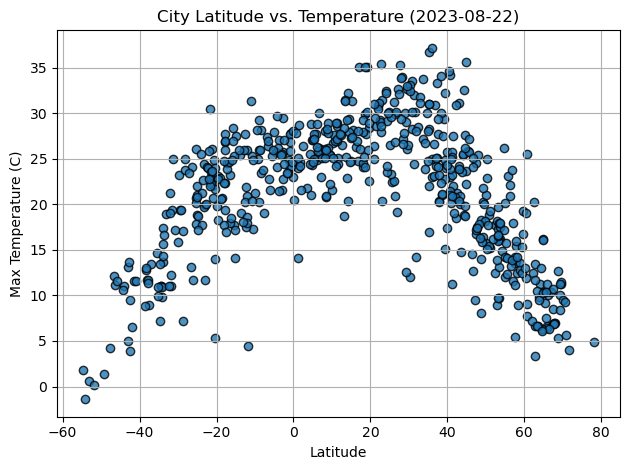

In [14]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha=.8, edgecolors="k")

# Incorporate the other graph properties
date = datetime.now()
date = date.strftime("%Y-%m-%d")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs. Temperature ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

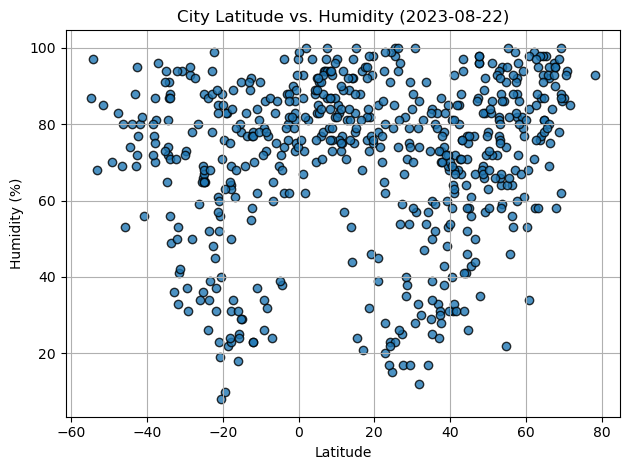

In [16]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha=.8, edgecolors="k")

# Incorporate the other graph properties
date = datetime.now()
date = date.strftime("%Y-%m-%d")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({date})")
plt.grid(True) 
plt.tight_layout()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

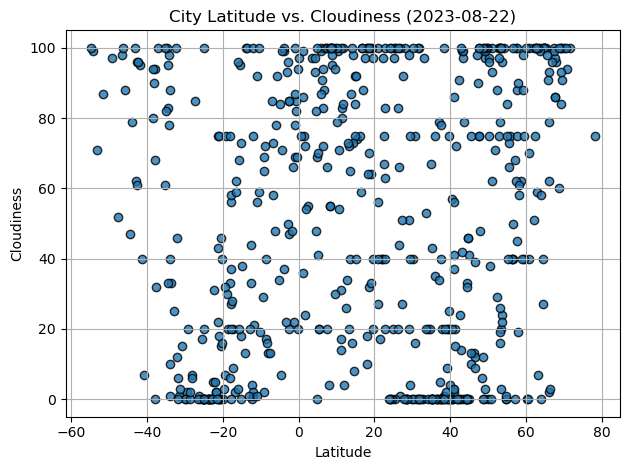

In [17]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha=.8, edgecolors="k")

# Incorporate the other graph properties
date = datetime.now()
date = date.strftime("%Y-%m-%d")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.grid(True) 
plt.tight_layout()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

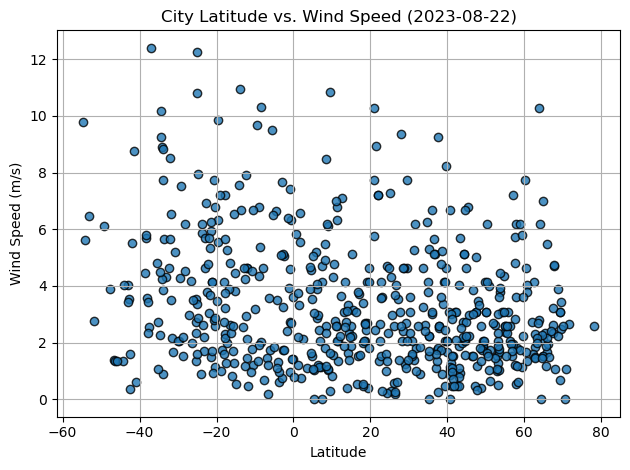

In [18]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha=.8, edgecolors="k")

# Incorporate the other graph properties
date = datetime.now()
date = date.strftime("%Y-%m-%d")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.grid(True) 
plt.tight_layout()
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [53]:
# Define a function to create Linear Regression plots
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [54]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
North_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) > 0, :]

# Display sample data
North_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,summerside,46.3959,-63.7876,14.50,77,13,1.54,CA,1692750014
2,al bawiti,28.3492,28.8659,27.18,35,0,2.39,EG,1692750015
3,bikenibeu village,1.3673,173.1241,28.70,73,75,3.34,KI,1692750015
5,madaoua,14.0730,5.9600,32.21,44,16,3.33,NE,1692750015
8,buka,40.8108,69.1986,23.04,31,0,1.04,UZ,1692750016


In [55]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
South_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) < 0, :]

# Display sample data
South_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kundiawa,-6.0167,144.9667,21.56,75,78,1.73,PG,1692749736
4,blackmans bay,-43.0167,147.3167,13.07,69,62,4.03,AU,1692750015
6,sola,-13.8833,167.5500,25.39,83,100,10.94,VU,1692749737
7,tsiombe,-25.3000,45.4833,20.75,66,0,2.71,MG,1692750015
9,port-aux-francais,-49.3500,70.2167,1.40,70,97,6.11,TF,1692750016


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.7058758138444994


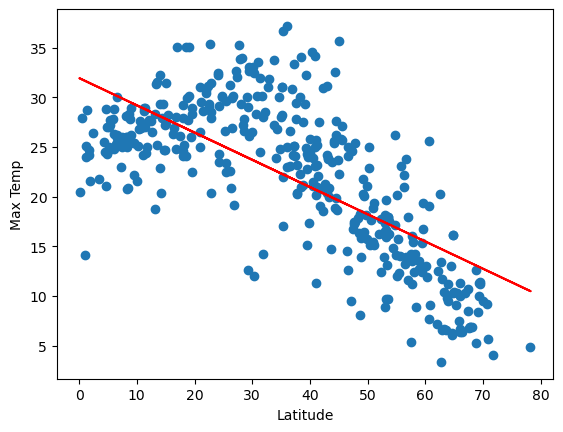

In [56]:
# Linear regression on Northern Hemisphere
x_values = North_df["Lat"]
y_values = North_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f'The r-value is {rvalue}')

The r-value is -0.056878387327787557


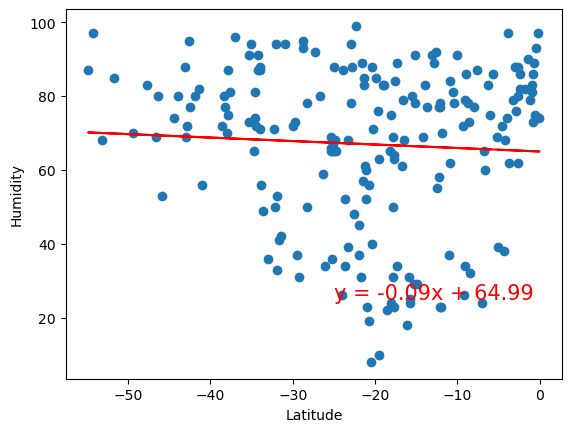

In [57]:
# Linear regression on Southern Hemisphere
x_values = South_df["Lat"]
y_values = South_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** 
The regression line is negative showing that as the latitiude increases the max Temp decreases. While the humidity will stagnate at all latitudes.

### Humidity vs. Latitude Linear Regression Plot

The r-value is -0.7058758138444994


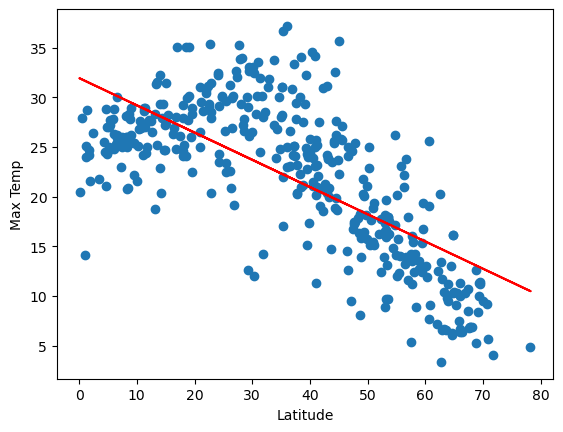

In [58]:
# Northern Hemisphere
x_values = North_df["Lat"]
y_values = North_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f'The r-value is {rvalue}')

The r-value is -0.056878387327787557


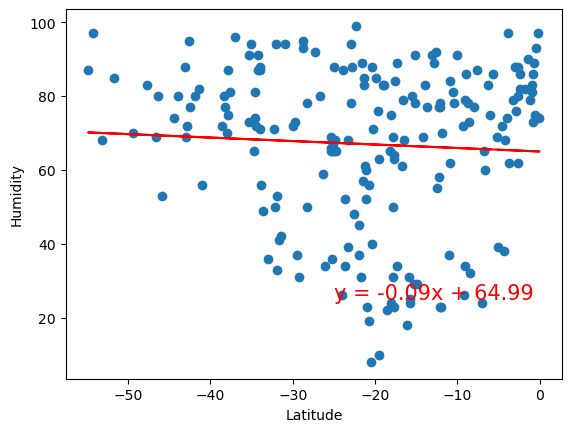

In [59]:
# Southern Hemisphere
x_values = South_df["Lat"]
y_values = South_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** 
In this case, as you got closer to the latitude the max Temp will increase. Yet the humidity stays the same still.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.0004022634011602246


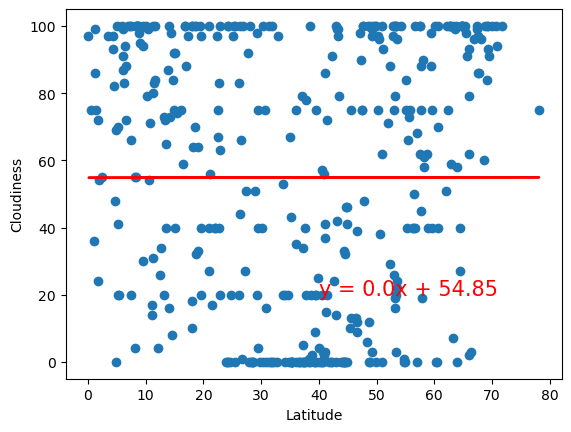

In [60]:
# Northern Hemisphere
x_values = North_df["Lat"]
y_values = North_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r-value is {rvalue}')

The r-value is -0.0556357591373533


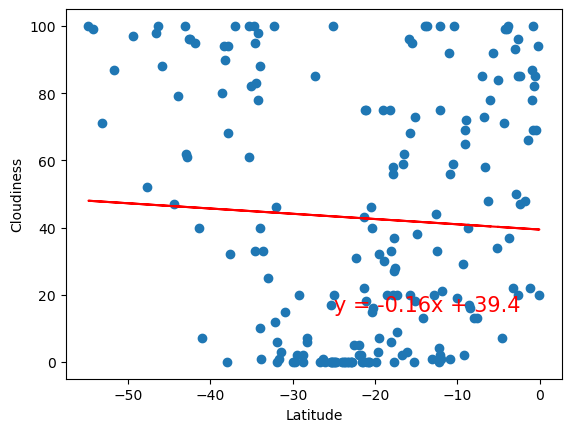

In [61]:
# Southern Hemisphere
x_values = South_df["Lat"]
y_values = South_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:**
I'm unable to see a difference or similarity within the data set. Also the r value is indicates the data is unreliable when it comes to correlations.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is -0.08830869007538782


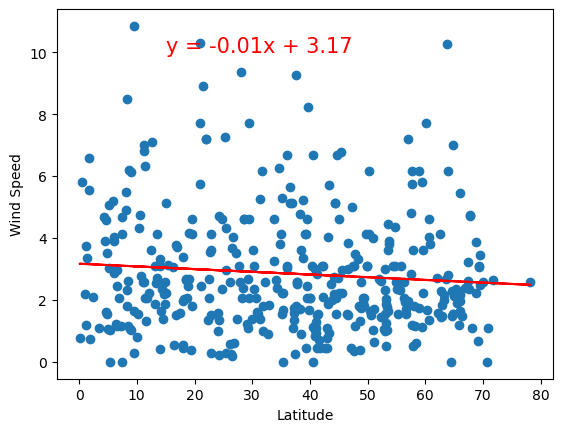

In [62]:
# Northern Hemisphere
x_values = North_df["Lat"]
y_values = North_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(15,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'The r-value is {rvalue}')

The r-value is -0.12495221816560756


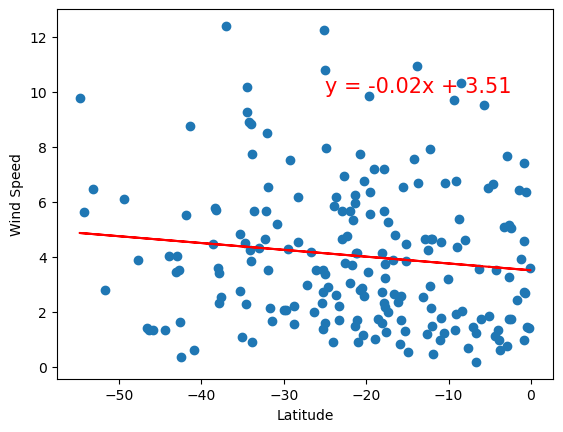

In [63]:
# Southern Hemisphere
x_values = South_df["Lat"]
y_values = South_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** 
The data shows there is no correlations due to the data being scattered.